In [3]:
#Loading the data into a dataframe

import csv
import pandas as pd
import matplotlib.pyplot as plt

#Importing a limited section of the dataset for now for easier processing
df = pd.read_csv("poisonous_mushrooms.csv", nrows=10000)
# Source: https://www.kaggle.com/datasets/davinascimento/poisonous-mushrooms?resource=download
# this assumes that you have the csv downloaded and stored in the same directory as this file

# Iterates through the columns, prints out counts of each data for each column
for column in df:
	df_series = df[column]
	results = df_series.value_counts()
	print("Results for column: ", column)
	print(results)
	print("Missing: ", df_series.isnull().sum(), "\n")

# results will be looked at more carefully in below cells, so don't worry about scrolling


Results for column:  id
id
0       1
6670    1
6663    1
6664    1
6665    1
       ..
3333    1
3334    1
3335    1
3336    1
9999    1
Name: count, Length: 10000, dtype: int64
Missing:  0 

Results for column:  class
class
p    5477
e    4523
Name: count, dtype: int64
Missing:  0 

Results for column:  cap-diameter
cap-diameter
1.52     35
3.71     31
3.77     31
4.04     29
3.04     29
         ..
9.89      1
21.38     1
12.38     1
15.90     1
52.51     1
Name: count, Length: 1554, dtype: int64
Missing:  0 

Results for column:  cap-shape
cap-shape
x    4597
f    2128
s    1155
b    1070
p     387
o     352
c     310
d       1
Name: count, dtype: int64
Missing:  0 

Results for column:  cap-surface
cap-surface
t        1501
s        1244
y        1064
h         945
g         813
d         689
k         391
e         389
w         361
i         327
l         146
15.94       1
f           1
Name: count, dtype: int64
Missing:  2128 

Results for column:  cap-color
cap-color
n    4371


Focusing first on the counts of different attributes in the categorical cells...

First is the poisonous or edible attribute (p = poisonous, e = edible)

This is the target data. As the results below show, about 55% of this subsample (when N = 2000) is poisonous, which is relatively balanced

In [4]:
print(df["class"].value_counts())

class
p    5477
e    4523
Name: count, dtype: int64


Cap Data:

Labels from the Kaggle dataset

cap-shape: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s, oval=o

cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s, l: silky

cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y, black=k


These seem like they would make good features (at least in terms of data quality)


In [5]:
for cat in ["cap-shape", "cap-surface", "cap-color"]:
	print(df[cat].value_counts())
	print("Missing: ", df_series.isnull().sum(), "\n")


#Results suggest solid mix of cap shapes and surface types; might need to sample from shape and color data to balance the input sets

cap-shape
x    4597
f    2128
s    1155
b    1070
p     387
o     352
c     310
d       1
Name: count, dtype: int64
Missing:  0 

cap-surface
t        1501
s        1244
y        1064
h         945
g         813
d         689
k         391
e         389
w         361
i         327
l         146
15.94       1
f           1
Name: count, dtype: int64
Missing:  0 

cap-color
n    4371
y    1223
w    1198
g     723
e     646
o     543
p     311
u     249
r     232
k     212
b     181
l     111
Name: count, dtype: int64
Missing:  0 



cap-diameter:

In [6]:
print(df["cap-diameter"].describe())
print("Missing: ", df_series.isnull().sum(), "\n")

count    10000.000000
mean         6.337571
std          4.831925
min          0.500000
25%          3.300000
50%          5.760000
75%          8.240000
max         58.110000
Name: cap-diameter, dtype: float64
Missing:  0 



gill data:

All categories, summaries below. Some are missing attributes:

gill-attachment: attached=a, descending=d, free=f, notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y

In [7]:
for column in ["gill-attachment", "gill-spacing", "gill-color"]:
	df_series = df[column]
	print(column)
	print("Missing: ", df_series.isnull().sum(), "\n")

gill-attachment
Missing:  1660 

gill-spacing
Missing:  4040 

gill-color
Missing:  0 



Gill spacing missing enough data that it would probably be simpler to ignore it

Stem Data:


In [8]:
for column in ["stem-width", "stem-height"]:
	df_series = df[column]
	print(column)
	print(df_series.describe())
	zeros = df_series.value_counts().get(0.0)
	print("Missing: ", zeros, "\n")

stem-width
count    10000.000000
mean        11.158067
std          8.167508
min          0.000000
25%          4.950000
50%          9.600000
75%         15.782500
max         86.520000
Name: stem-width, dtype: float64
Missing:  1 

stem-height
count    10000.000000
mean         6.363452
std          2.754037
min          0.000000
25%          4.660000
50%          5.840000
75%          7.420000
max         29.340000
Name: stem-height, dtype: float64
Missing:  1 



Other relevant data:
does-bruise-or-bleed
has-ring

Imbalanced features, but not too hard to clean


Spore color, Veil Color, and Veil Type has more missing entries than filled, so those will likely be ignored

### Correlation Analysis
Several of the attributes are continous values, so we can find the correlation between them

      poisonous  cap-diameter  stem-width  stem-height
0             0          8.80       15.39         4.51
1             1          4.51        6.48         4.79
2             0          6.94        9.93         6.85
3             0          3.88        6.53         4.16
4             0          5.85        8.36         3.37
...         ...           ...         ...          ...
9995          1          1.35        2.58         1.84
9996          0          3.78        3.32         4.74
9997          0          9.58       23.05         9.89
9998          0          6.20        7.78         5.19
9999          1          0.89        2.36         3.12

[10000 rows x 4 columns]


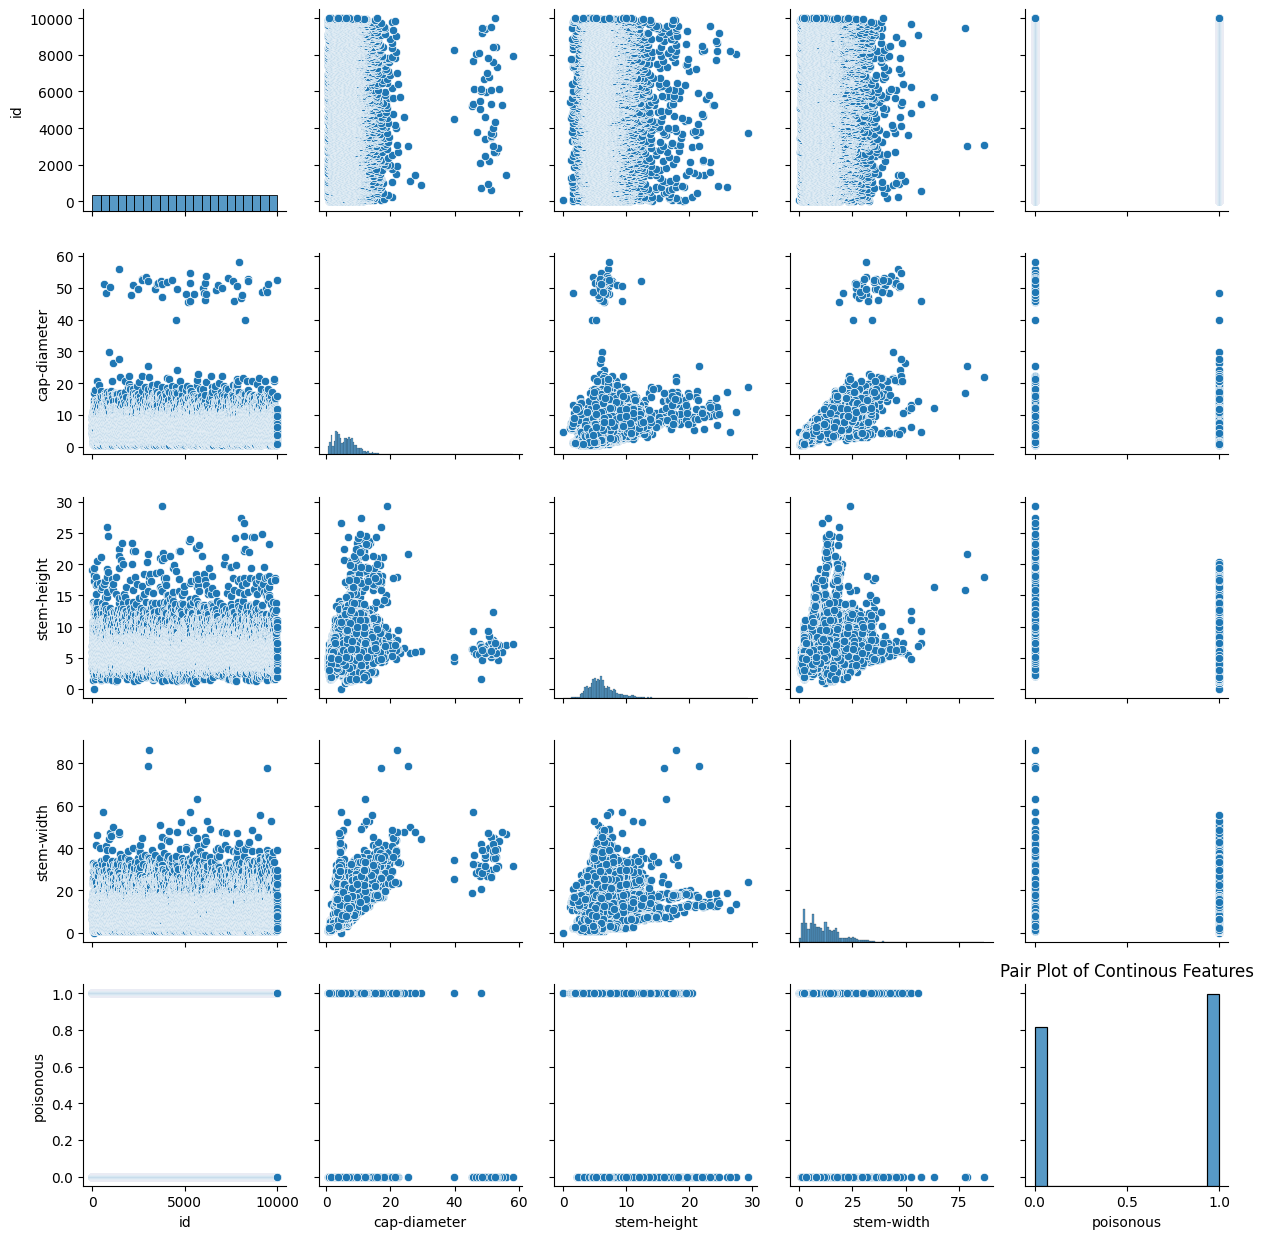

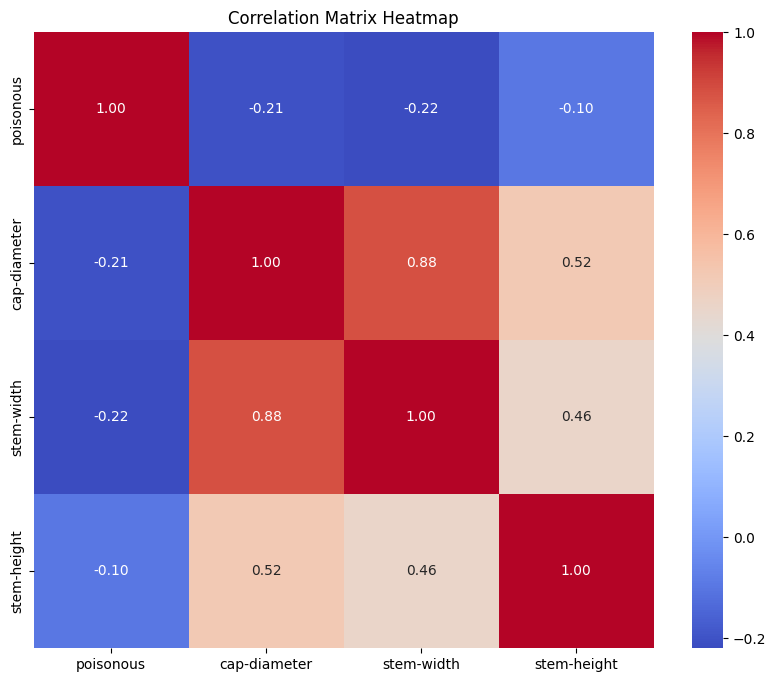

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Map poisionous or not to an integer
mapping = {'p': 1, 'e': 0}
df_r = df["class"].map(mapping)

# Rename target feature to "poisionous" in the dataframe
df_r.rename({"class": "poisonous"})
df["poisonous"] = df_r
df.drop("class", axis=1)
df.drop("id", axis=1)

# Create a heatmap for the correlation matrix
continuousFeatures = ["poisonous", "cap-diameter", "stem-width", "stem-height"]
dfC = df[continuousFeatures]
print(dfC)

# from Lab 0
# Measure the relationships between different features
# Visualize relationships using scatter plots
sns.pairplot(df)
plt.title('Pair Plot of Continous Features')
plt.tight_layout()
plt.show()

# Calculate correlation matrix
correlation_matrix = dfC.corr('spearman')

# Visualize correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

These results suggest that all three of these continous variables are not directly correlated with the poisonous attribute. Outliers have yet to be handled, so this might need to be rerun to ensure that this isn't affecting the numbers.

As for the categorical data, we can simply look at the counts of how many of each label are poisonous or not to try to get a feel for which features matter.


For example, the following code looks at cap shape.

   cap-shape  poisonous  count
0          b          0    234
1          b          1    836
2          c          0    151
3          c          1    159
4          d          0      1
5          f          0   1065
6          f          1   1063
7          o          0    115
8          o          1    237
9          p          0    200
10         p          1    187
11         s          0    551
12         s          1    604
13         x          0   2206
14         x          1   2391


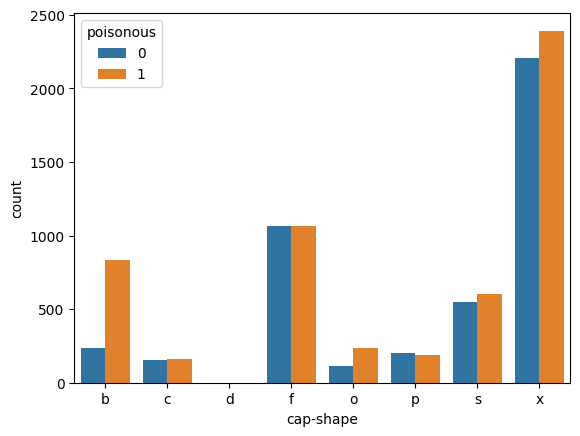

In [10]:
def countFeatureAndPoisonousCases(df, feature, printTable=False):
	features = [feature, "poisonous"]
	df_T = df[features]
	df_T = df_T.groupby(feature)["poisonous"].value_counts().sort_index()
	df_T = df_T.to_frame().reset_index()
	if printTable:
		print(df_T)
	sns.barplot(x=df_T[feature], y=df_T["count"], hue=df_T["poisonous"])
	plt.show()

countFeatureAndPoisonousCases(df, "cap-shape", printTable=True)

The next code blocks do the same thing for a number of other variables...

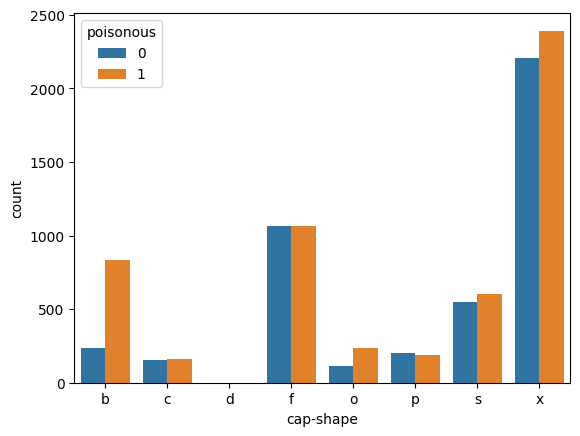

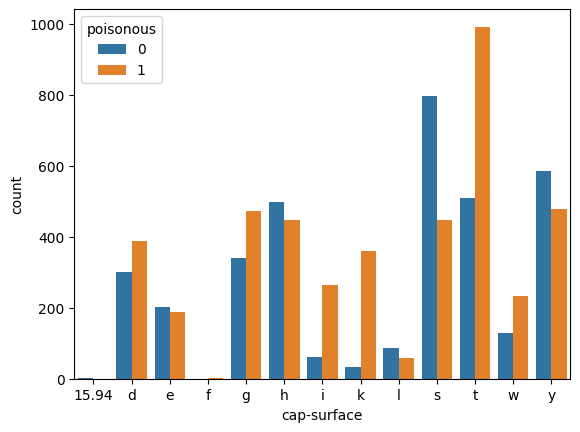

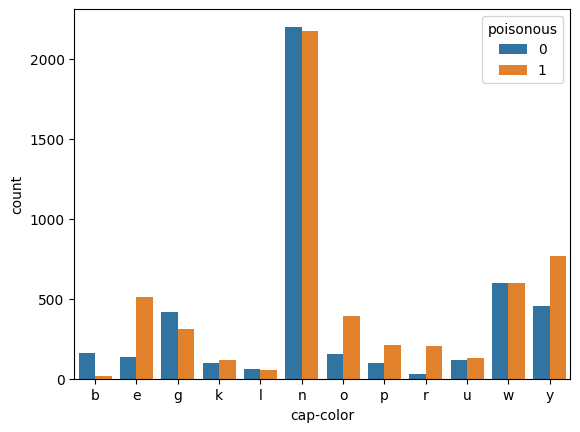

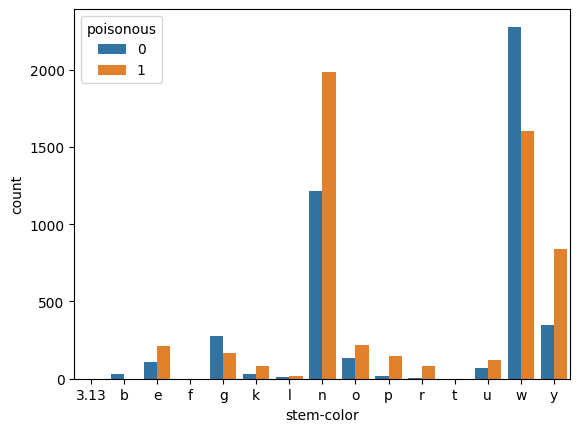

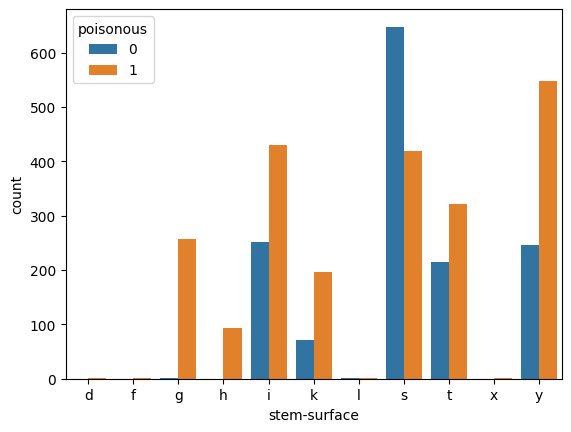

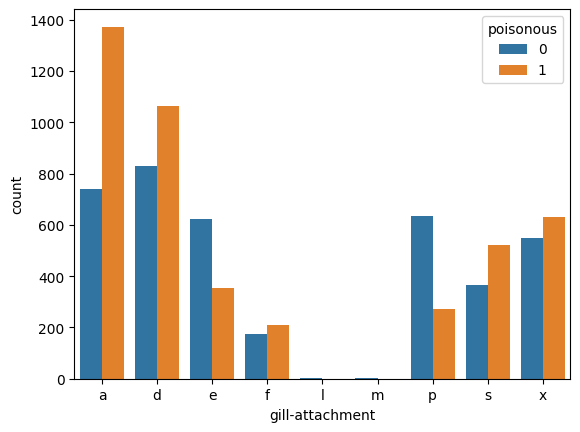

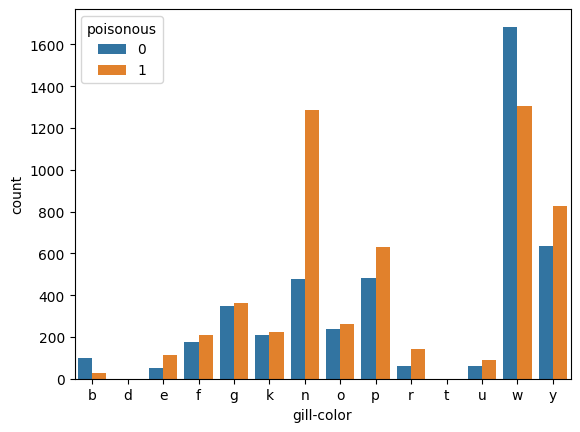

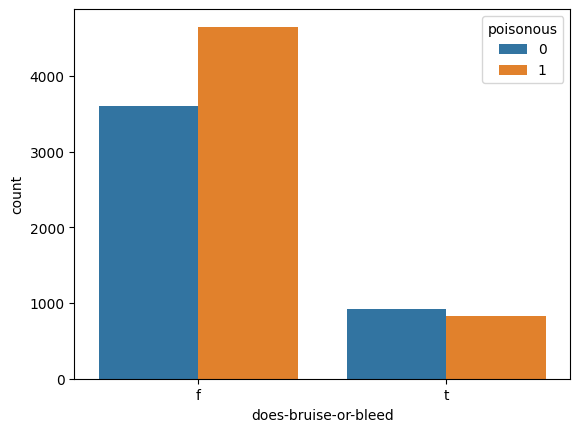

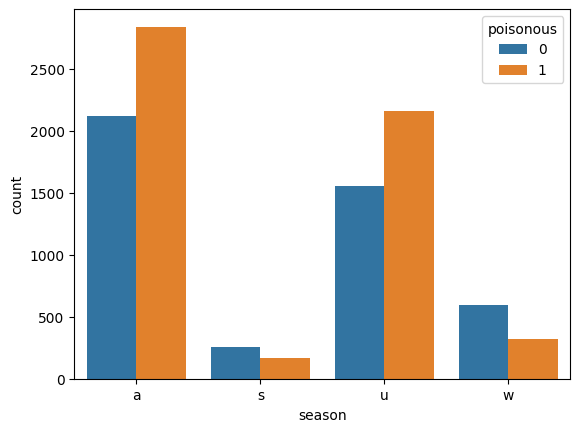

In [11]:
for attr in ["cap-shape", "cap-surface", "cap-color", "stem-color", "stem-surface", "gill-attachment","gill-color", "does-bruise-or-bleed", "season"]:
	countFeatureAndPoisonousCases(df, attr)

Based on the results above, I suspect we should use stem color, stem surface, gill attachment, gill color, cap surface, and cap color. Diameter and height might also be interesting, but don't seem to provide any apparent benefit at the moment.

### Delving Deeper into Data

In [12]:
#from statsmodels.graphics.mosaicplot import mosaic

# Sample code showing how to use the Crosstab feature from pandas
def generateCrosstab(dataframe, ind, col):
	inList = []
	colList = []
	for indCat in ind:
		inList.append(dataframe[indCat])
	for colCat in col:
		colList.append(dataframe[colCat])
	return pd.crosstab(index=inList, columns=colList)

ct = generateCrosstab(df, ["cap-color", "season"], ["poisonous", "does-bruise-or-bleed"])
print(ct)

# Create the mosaic plot
#mosaic(ct.stack(), title='Mosaic Plot Example')

# Show the plot
#plt.show()

poisonous               0         1     
does-bruise-or-bleed    f    t    f    t
cap-color season                        
b         a            92    0   11    0
          s             1    0    0    0
          u            18    0    8    0
          w            51    0    0    0
e         a            39   29  247   56
          s             0    0   19    0
          u            23   28  143   23
          w            17    0   22    0
g         a           123   21  127   42
          s            61    0   11    0
          u            84   30   84   20
          w            95    0   24    1
k         a            45    1   48    7
          s             0    0    1    0
          u            38    0   54    2
          w            12    0    4    0
l         a            27    0   27    0
          u            22    0   24    0
          w            10    0    1    0
n         a           783  269  915  173
          s           124    0   94    0
          u     

In [13]:
print(generateCrosstab(df, ["gill-color", "gill-attachment"], ["poisonous"]))

poisonous                     0    1
gill-color gill-attachment          
b          a                  1    0
           d                 25   27
           s                 23    0
d          x                  0    1
e          a                 29    0
           e                  0    1
           p                 24   37
           x                  0   21
f          f                174  210
g          a                 85  139
           d                  2   33
           e                 25   15
           l                  1    0
           p                 46    0
           s                 69   59
           x                  9    0
k          a                 30   56
           d                  1    0
           e                 41   12
           x                  1    0
n          a                 69  445
           d                  1  267
           e                 71   26
           p                129   69
           s                 22  118
 

From the gill data, we find the following strong predictors:
Green gills + attached or descending --> more likely poisonsous, "P" (just realized that gill attachment has some non-listed attributes in the guide)

Brown gills:
attached and detached strongly poisonous, same with "s"; "e" & "x" less so

Pink gills:
detached more likely good, as with "e" & "s". "x" typically poisonous


(Probably worth delving into this for later models, but thinking we should keep it simple for now)


### Logistic Regresion with Stochastic Gradient Descent


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


X = df.drop('class', axis = 1)
y = df['class']

label_encoders = {}
for column in X.columns:
    if X[column].dtype == 'object': 
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column])
        label_encoders[column] = le

if y.dtype == 'object':
    le_y = LabelEncoder()
    y = le_y.fit_transform(y)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .3, random_state=42)

X_train.head()

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season,poisonous
9069,9069,11.04,7,10,10,0,0,1,12,11.31,...,11,13,1,6,0,1,7,0,0,1
2603,2603,3.24,7,5,5,0,9,0,6,5.41,...,7,13,1,4,0,1,1,0,3,0
7738,7738,6.15,7,8,10,0,1,3,8,3.53,...,11,13,1,6,0,1,7,1,2,0
1579,1579,7.05,3,9,5,0,7,0,12,5.73,...,4,7,1,6,0,1,7,3,3,0
5058,5058,8.17,7,5,8,0,9,0,12,11.24,...,11,13,0,4,2,2,7,0,0,1


In [53]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report 

# Initialize and train classifier
classifier = SGDClassifier(loss='log_loss', max_iter=100)
model = classifier.fit(X_train, y_train)

y_pred = model.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred, normalize=True)
class_report = classification_report(y_test, y_pred)

# Print results
print("The accuracy of the model is:", lr_accuracy)
print("Classification Report:\n", class_report)


The accuracy of the model is: 0.5606666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.02      0.03      1318
           1       0.56      0.99      0.72      1682

    accuracy                           0.56      3000
   macro avg       0.53      0.50      0.37      3000
weighted avg       0.53      0.56      0.42      3000



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


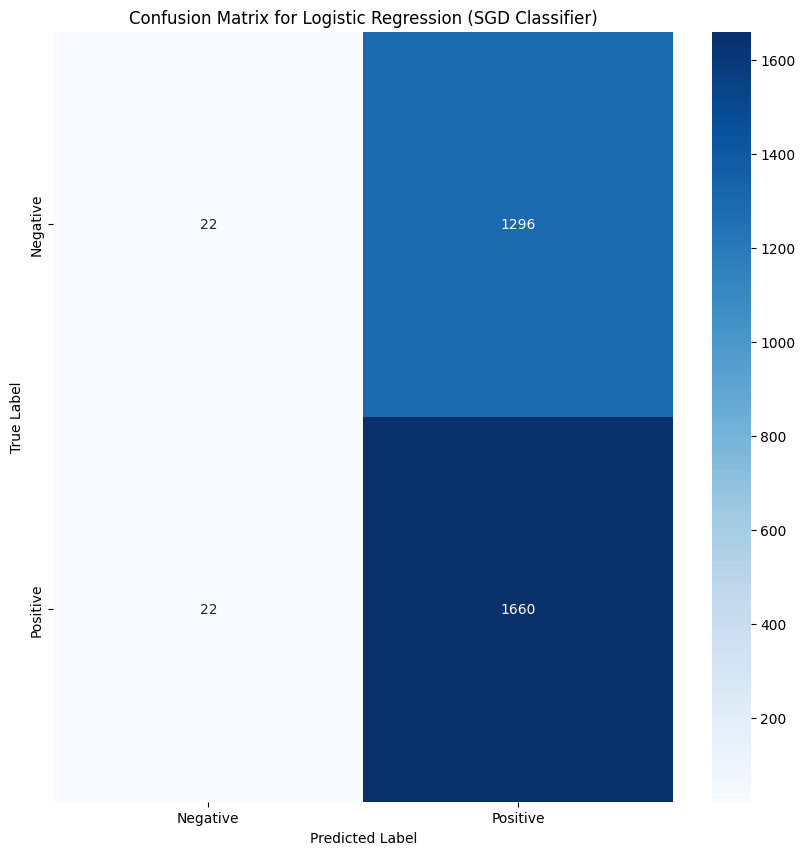

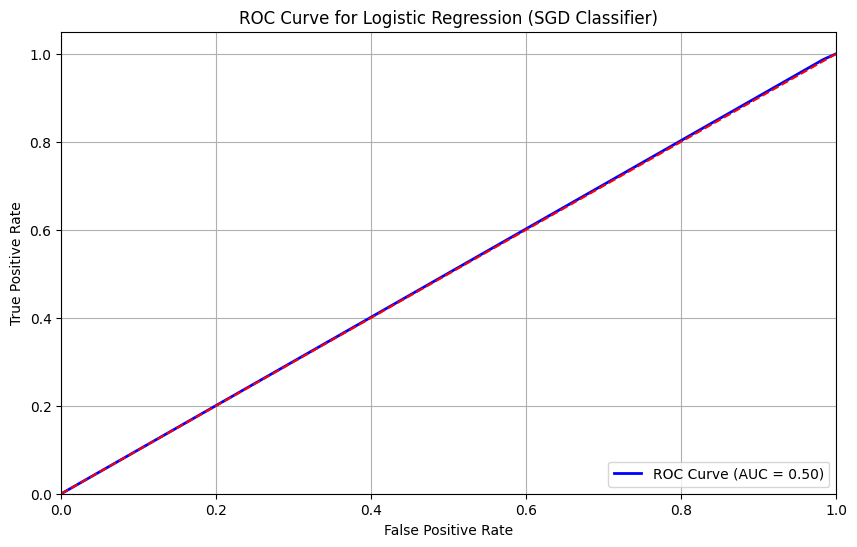

In [54]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns

confusion_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for Logistic Regression (SGD Classifier)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression (SGD Classifier)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Deep Neural Network with Stochastic Gradient Descent


In [42]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler

X = df.drop('class', axis=1)
y = df['class']

# Encode features
label_encoders = {}
for column in X.columns:
    if X[column].dtype == 'object': 
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column])
        label_encoders[column] = le
y = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#deep neural network
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),#Hidden layer
    layers.Dense(1, activation='sigmoid') #Output layer
])

# stochastic gradient descent
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


Epoch 1/100
  2/175 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - accuracy: 0.3359 - loss: 0.8702 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5360 - loss: 0.7002 - val_accuracy: 0.8521 - val_loss: 0.5062
Epoch 2/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - accuracy: 0.8908 - loss: 0.4452 - val_accuracy: 0.9771 - val_loss: 0.2716
Epoch 3/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 316us/step - accuracy: 0.9893 - loss: 0.2234 - val_accuracy: 0.9986 - val_loss: 0.1142
Epoch 4/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - accuracy: 1.0000 - loss: 0.0932 - val_accuracy: 0.9993 - val_loss: 0.0541
Epoch 5/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - accuracy: 1.0000 - loss: 0.0467 - val_accuracy: 1.0000 - val_loss: 0.0311
Epoch 6/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 307us/step - accuracy: 1.0000 - loss: 0.0271 - val_accuracy: 1.0000 - val_loss: 0.0204
Epoch 7/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 338us/step - accuracy: 1.0000 - loss: 0.0179 - val_accuracy: 1.0000 - val_loss: 0.0146
Epoch 8/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 306us/step - accuracy: 1.0000 - loss: 0.0130 - val_ac

In [43]:
print("The accuracy of the model is:", accuracy)
print("Classification Report:\n", class_report)

The accuracy of the model is: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1318
           1       1.00      1.00      1.00      1682

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



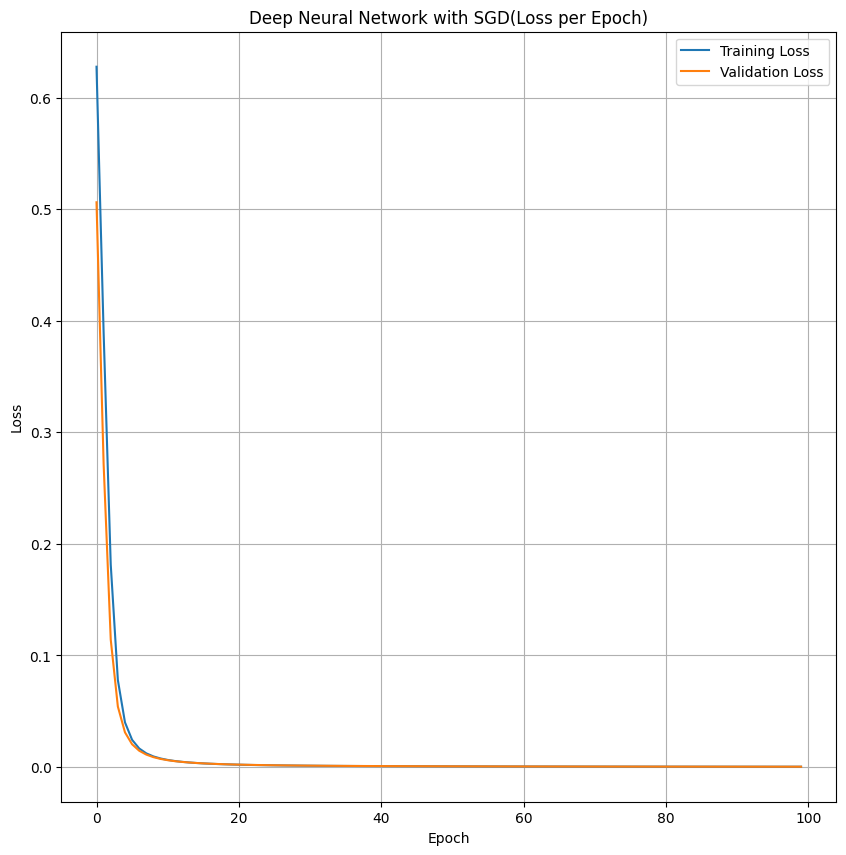

In [46]:
# Plot Loss per Epoch for Deep Neural Network
plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Deep Neural Network with SGD(Loss per Epoch)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
